# **Project Name**    -  Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - T.Sai Narasimha Charan**

# **Project Summary -**

The Retail Sales prediction data is provided with two csv files that is Rossman and Stores which contains different variables of information.It consists combinly about 19 variables which contain different kind of information

As the first step of the project we have performed data cleaning as well as data wrangling by merging both of tables in the next step we have performed Exploratory Data Analysis(EDA) in which we created different visualization charts to analyze the data we found that some interesting facts like sales are highly correlated with customers,there were more sales on Monday,probably because shops are closed on Sundays,it could be seen that the promo leads to more sales,more stores open on school holidays than on state holiday and hence had more sales than state holidays,on an average store type B had the highest sales,Highest average sales were seen with Assortment levels-b which is ‘extra’,82.1% sales are not affected and only 17.9% sales is affected because of school holiday etc.

In the next step I have done hypothetical testing Hypothesis: Stores located closer to competition have significantly lower sales than stores located further away.Null hypothesis: There is no significant difference in sales between stores located closer to competition and stores located further away. Alternative hypothesis: Stores located closer to competition have significantly lower sales than stores located further away.To test this hypothesis, we can perform a two-sample t-test between the sales of stores located within 10 km of competition and stores located further away. We can set a significance level of 0.05

After that I have performed feature engineering like filling missing values,handling of null values,handling columns,deleting unnecessary columns,feature processing,feature extracting,Outliers handling,feature selection.

In the last step most important step of my project that is model deployment. I have deployed two models first one is the linear regression and second one is the lasso regression final conclusion of both of the models -The MSE and R2 score are commonly used evaluation metrics for regression models. In this case, the Linear Regression and Lasso Regression models have very similar performance, with the Lasso Regression model having a slightly lower MSE and a slightly higher R2 score.The mean squared error (MSE) measures the average squared difference between the predicted and actual values, where a lower MSE indicates better performance.The Rsquared (R2) score measures the proportion of the variance in the dependent variable that is predictable from the independent variables, where a higher R2 score indicates better performance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Ross*mann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/2.Regression/Rossmann Stores Data.csv')


<ipython-input-3-5aaa26e865e5>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/2.Regression/Rossmann Stores Data.csv')


In [4]:
#Loading Store Dataset
stores_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/2.Regression/store.csv', low_memory= False)

### Dataset First View

In [5]:
# Dataset First Look
rossman_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
#tail of the Data set
rossman_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


**Store Data Set**

In [7]:
#Store Dataset Head
stores_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [8]:
#Store Data Set Tail
stores_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
rossman_df.shape


(1017209, 9)

**Store Dataset**

In [10]:
#Store Dataset Rows & Columns count
stores_df.shape

(1115, 10)

**Merging of two Datasets**

In [11]:
#merge the datasets
df = rossman_df.merge(right=stores_df, on="Store", how="left")

In [12]:
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [14]:
df.shape

(1017209, 18)

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
#Find duplicates
duplicate=df[df.duplicated()]

#print the duplicate
print(f'There are {len(duplicate)} duplicate rows in the data.')

#duplicate sales of specific columns
duplicate_sales = df[df.duplicated(subset=['Sales'])]

# Print the number of duplicate sales
print(f'There are {len(duplicate_sales)} rows with duplicate sales values.')

There are 0 duplicate rows in the data.
There are 995475 rows with duplicate sales values.


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: >

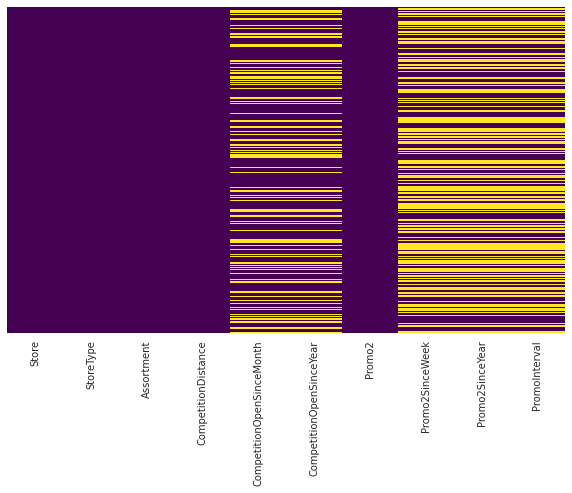

In [17]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(stores_df.isnull(),yticklabels= False, cbar= False, cmap= 'viridis')

<ipython-input-18-653d0b3886d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['CompetitionDistance'], hist = True)


Text(0.5, 0, 'Competition Distance Distribution Plot')

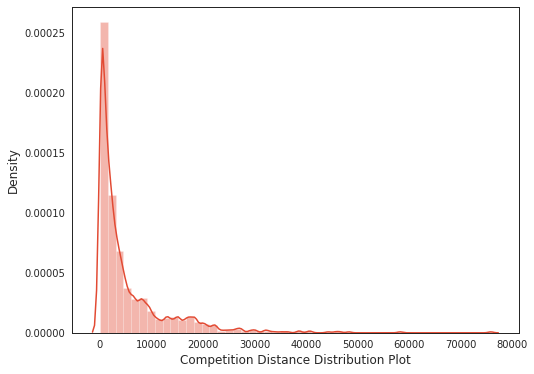

In [18]:
#distribution plot of competition distance
sns.distplot(x=df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

### What did you know about your dataset?

Answer Here

The data including two datasets rossman and store.Their is 1017209 rows and 9 columns in rossman datset and 1115 rows 9 columns in store dataset after merging the both of datasets 1017209 rows 18 columns this two of columns contains 0 duplicated rows and columns but contains duplicated values.Store dataset containing the missing values

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
# Dataset Describe
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

Dataset fields


Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

Store: [   1    2    3 ... 1113 1114 1115]
DayOfWeek: [5 4 3 2 1 7 6]
Date: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'


## 3. ***Data Wrangling***

### Data Wrangling Code

**Replace missing values in features with low percentages of missing values**

In [ ]:
# Write your code to make your dataset analysis ready

sns.distplot(df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")


In [23]:
# replace missing values in CompetitionDistance with median for the store dataset
df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace=True)


In [24]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [25]:
#creating features from the date

df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).week
df['DayOfYear'] = pd.DatetimeIndex(df['Date']).dayofyear
years = df['Year'].unique()

<ipython-input-25-00e0b2bc2273>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).week


### What all manipulations have you done and insights you found?

# New section
  1. Replace missing values in features with 
low percentages of missing values
  2. replace missing values in CompetitionDistance with median for the store dataset
  3. creating a categorical column list it is also necessary to work with categorical columns
  4. We have changed stateholiday to integer type
  5. creating features from the date

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

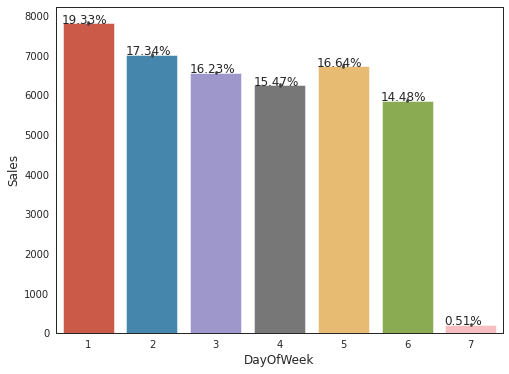

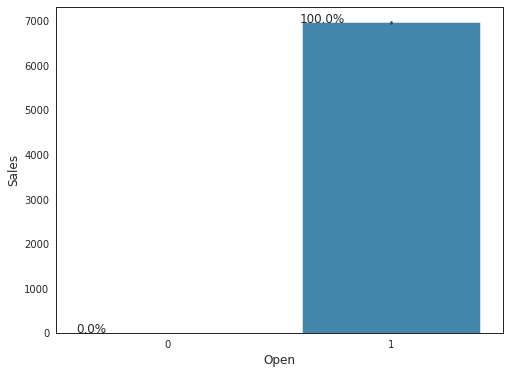

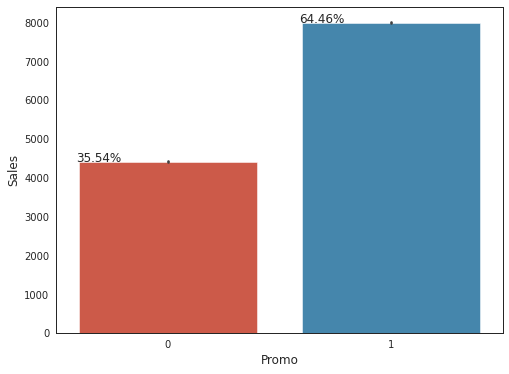

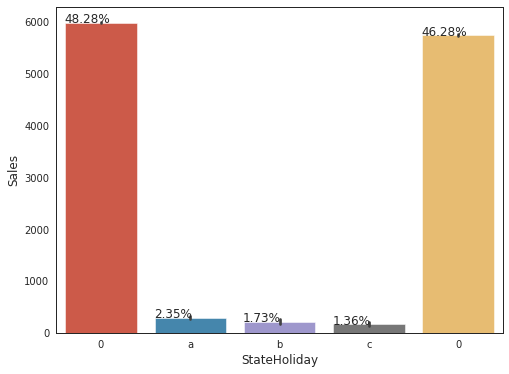

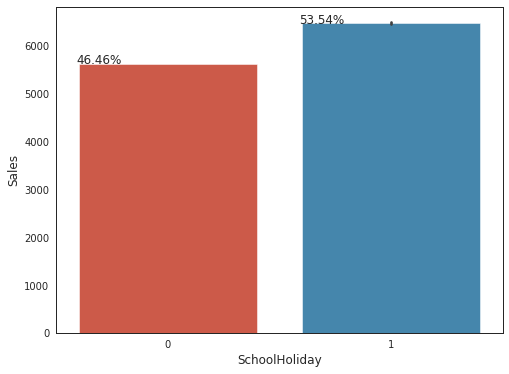

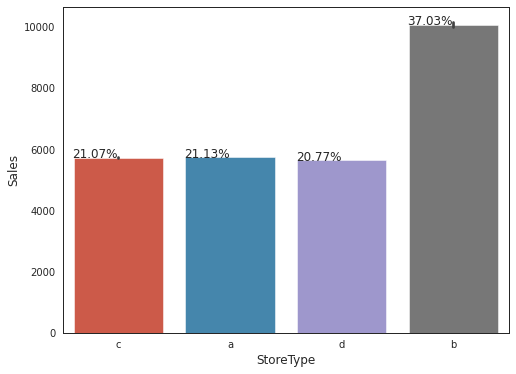

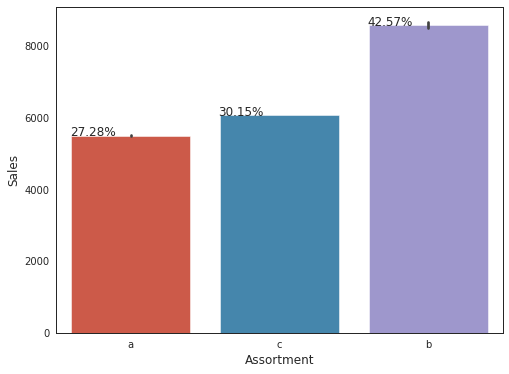

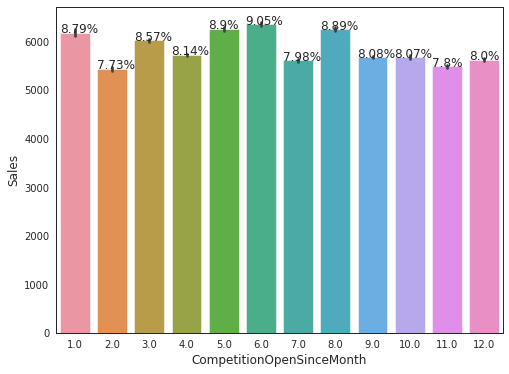

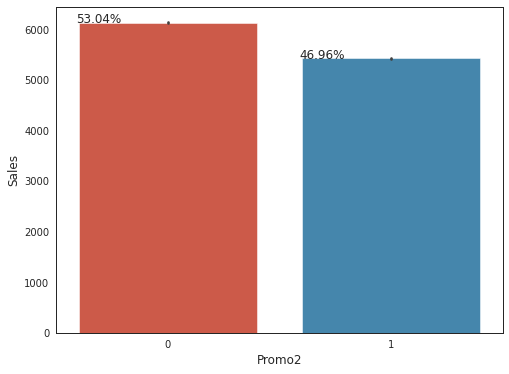

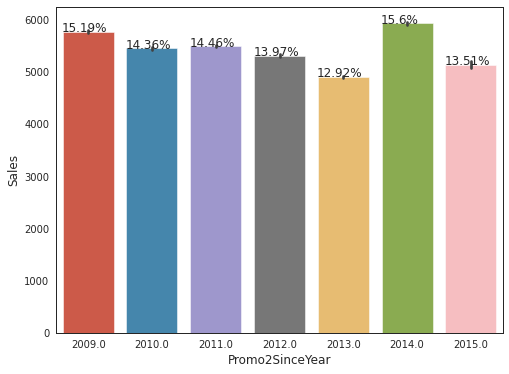

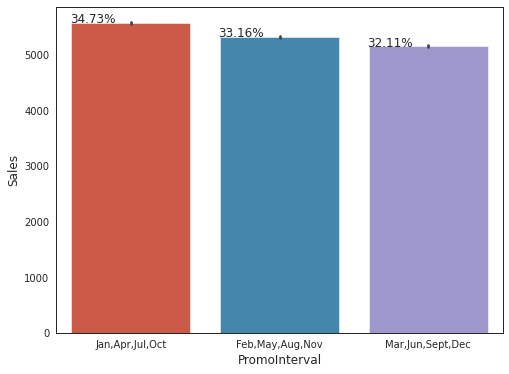

In [26]:
# Chart - 1 visualization code

#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

##### 1. Why did you pick the specific chart?

I want to all insights about the categorical values

##### 2. What is/are the insight(s) found from the chart?

####Observation:
1.  There were more sales on Monday, probably because shops generally remain closed on Sundays.
2. It could be seen that the Promo leads to more sales.
3. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
4. More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
5. On an average Store type B had the highest sales.
6. Highest average sales were seen with Assortment levels-b which is 'extra'.
7. With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is very important to know what impact do categorical values on sales.Yes their is some negative insights such as less sale on state holiday and if promo not used their is aslo less sales.

#### Chart - 2

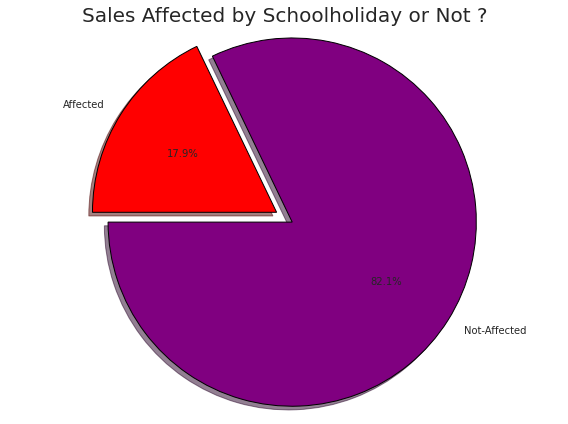

In [27]:
# Chart - 2 visualization code

#Sales affected on schoolholidays or not
labels = ['Not-Affected', 'Affected']
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['purple', 'red']

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=180, explode=(0.1, 0.0), 
       wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})
ax.set_title("Sales Affected by Schoolholiday or Not ?", fontsize=20)
ax.axis('equal')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To know the how many sales afffected by schoolholiday.

##### 2. What is/are the insight(s) found from the chart?

* 82.1% sales are not affected and  only 17.9% sales is affected because of schoo holiday

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes definitely because we will able to know to improve on each areas.It is positive signs that the most of sales is not affected only some % affected

#### Chart - 3

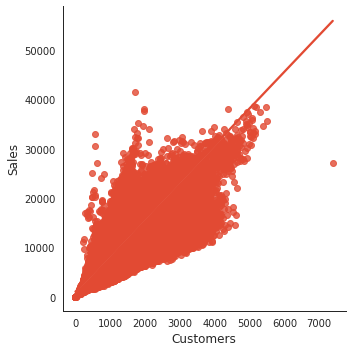

In [28]:
# Chart - 3 visualization code
sns.lmplot(x='Customers', y='Sales', data=df)

##### 1. Why did you pick the specific chart?

To know the customer vs sales relation.

##### 2. What is/are the insight(s) found from the chart?


*   As we can see their is linear relationship between customers and sales as customers increasing sales also increasing






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

it is positive signs that customers increasing then sales also increasing

#### Chart - 4

<Axes: xlabel='Promo', ylabel='Sales'>

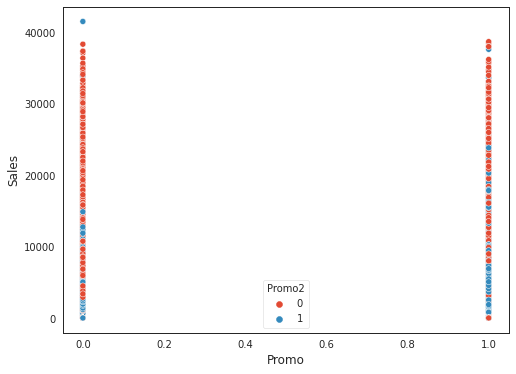

In [29]:
# Chart - 4 visualization code

#Promo vs sales relation
sns.scatterplot(data = df, x ="Promo", y = "Sales", hue = 'Promo2')

##### 1. Why did you pick the specific chart?

To know the promo vs sales relation

##### 2. What is/are the insight(s) found from the chart?

1. Here we can see that if their is no promo the sales is very less and if promo running their the sales is high.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it creates very much impact because we can observe that if promo using their is sales also increasing and if promo not using it is negative impact on sales

#### Chart - 5

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

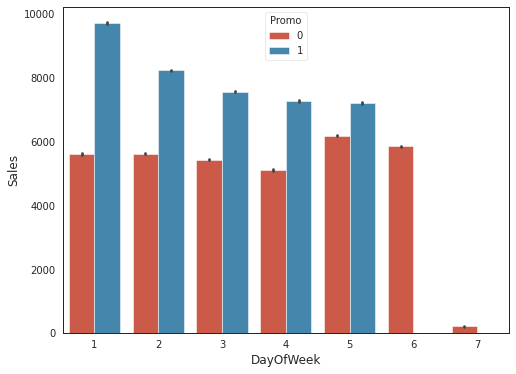

In [30]:
# Chart - 5 visualization code
#Barchart of promo vs sales impact
sns.barplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

##### 1. Why did you pick the specific chart?

To know the exact diffrence of sales when promo using and not using

##### 2. What is/are the insight(s) found from the chart?

Their is large diffrence on monday and it is decreasing day by day and on sunday their is no sales so it shwing less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO, it is actually not we can say because of promo only sale is increasing we should focus on increasing sales without promo also we should use promo everyday

#### Chart - 6

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

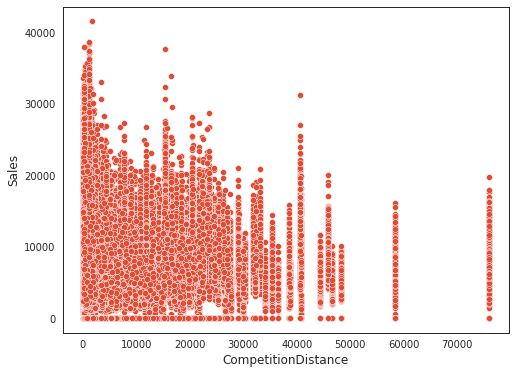

In [31]:
# Chart - 6 visualization code

#competition distance stores sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

To know the competition stores distance and sales

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes we are able to know the competitor stores and their sales make strategies according to it.

#### Chart - 7

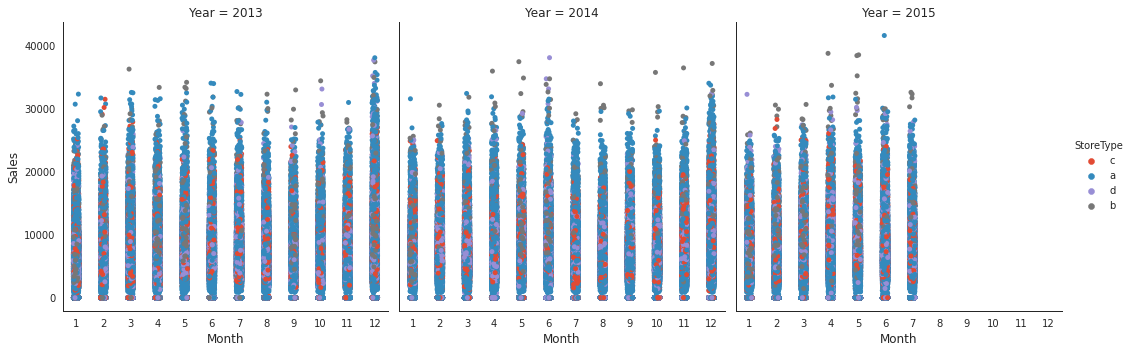

In [32]:
# Chart - 7 visualization code

#Trend of sales over the years
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

##### 1. Why did you pick the specific chart?

To know the trend of sales over the years.

##### 2. What is/are the insight(s) found from the chart?

In 2013 and 2014 their is some increasing in the sales but in 2015 their is some decreasing in trend of sales over the months

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It showing some negative growth in last year it should be some improve

#### Chart - 8

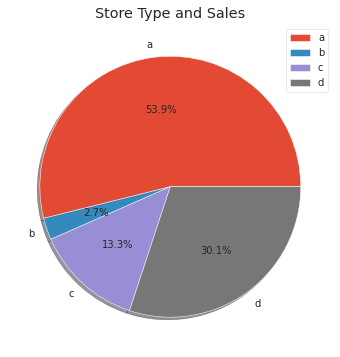

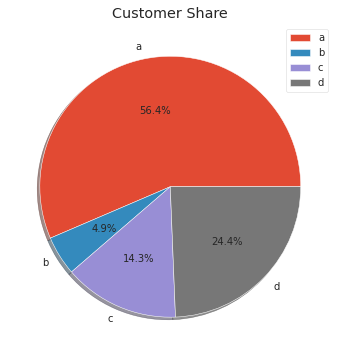

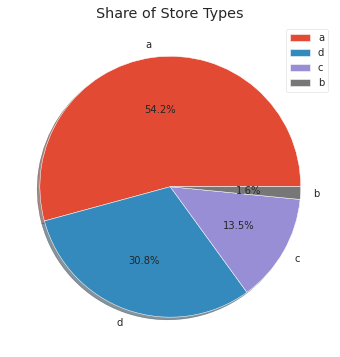

In [33]:
# Chart - 8 visualization code

# Sum of sales by store type
sales_by_store_type = df.groupby("StoreType")["Sales"].sum()

# Plotting pie chart of sales by store type
fig, ax = plt.subplots()
ax.pie(sales_by_store_type, labels=sales_by_store_type.index, autopct='%1.1f%%', shadow=True)
ax.set_title('Store Type and Sales')
plt.legend()
plt.show()

# Sum of customers by store type
customers_by_store_type = df.groupby("StoreType")["Customers"].sum()

# Plotting pie chart of customers by store type
fig, ax = plt.subplots()
ax.pie(customers_by_store_type, labels=customers_by_store_type.index, autopct='%1.1f%%', shadow=True)
ax.set_title('Customer Share')
plt.legend()
plt.show()

# Count of store types in the dataset
store_types = df["StoreType"].value_counts()

# Plotting pie chart of store types in the dataset
fig, ax = plt.subplots()
ax.pie(store_types, labels=store_types.index, autopct='%1.1f%%', shadow=True)
ax.set_title('Share of Store Types')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To know the Storetype and Sales,Customer Share,Share of Storetype

##### 2. What is/are the insight(s) found from the chart?

1. A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean. 
2. But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
3. Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Storetype A and B doing good sales but it is worry about c and d sales

#### Chart - 9

<Axes: >

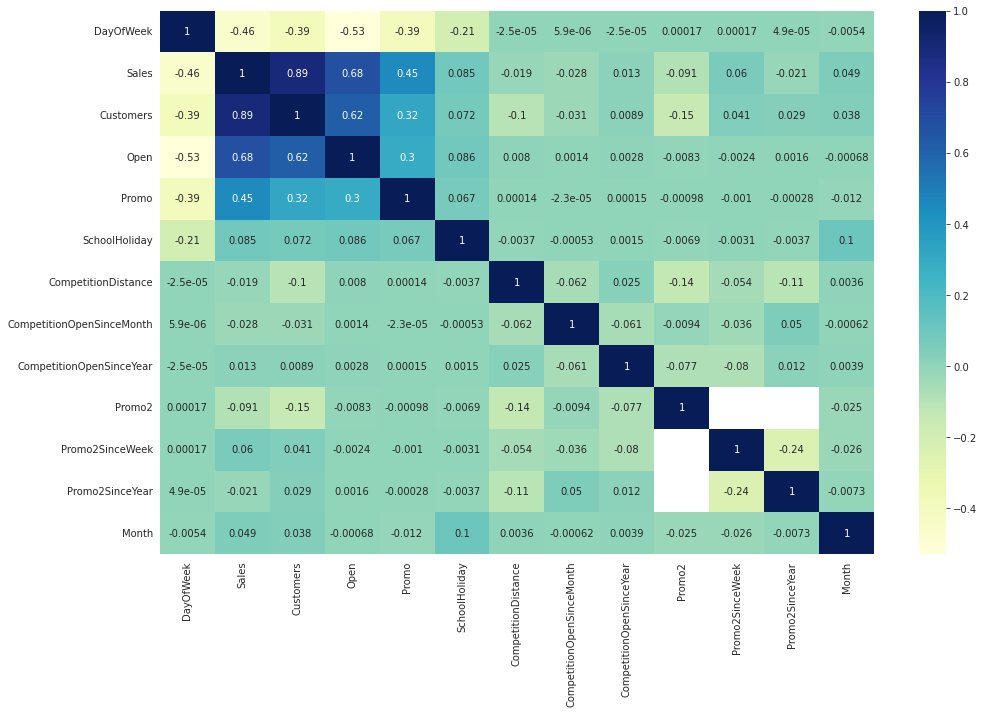

In [34]:
# Chart - 9 visualization code

#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True)

##### 1. Why did you pick the specific chart?

To know the correlations about categorical values.

####Observation:
* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Hypothesis: Stores located closer to competition have significantly lower sales than stores located further away.

2. Null hypothesis: There is no significant difference in sales between stores located closer to competition and stores located further away.

3. Alternative hypothesis: Stores located closer to competition have significantly lower sales than stores located further away.

4. To test this hypothesis, we can perform a two-sample t-test between the sales of stores located within 10 kms of competition and stores located further away. We can set a significance level of 0.05.

5. If the p-value is less than the significance level (0.05), we can reject the null hypothesis and conclude that stores located closer to competition have significantly lower sales than stores located further away. 

6. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference in sales between the two groups.

## ***6. Feature Engineering & Data Pre-processing***



```
# This is formatted as code
```

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
df =df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [ ]:
# let's first have a look at its distribution

sns.distplot(df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [37]:
# replace missing values in CompetitionDistance with median for the store dataset

df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace=True)


### 2.Handling Outliers





In [38]:
# Handling Outliers & Outlier treatments

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [39]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990515 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                990515 non-null  int64  
 1   DayOfWeek            990515 non-null  int64  
 2   Date                 990515 non-null  object 
 3   Sales                990515 non-null  int64  
 4   Customers            990515 non-null  int64  
 5   Open                 990515 non-null  int64  
 6   Promo                990515 non-null  int64  
 7   StateHoliday         990515 non-null  object 
 8   SchoolHoliday        990515 non-null  int64  
 9   StoreType            990515 non-null  object 
 10  Assortment           990515 non-null  object 
 11  CompetitionDistance  990515 non-null  float64
 12  Promo2               990515 non-null  int64  
 13  Year                 990515 non-null  int64  
 14  Month                990515 non-null  int64  
 15  WeekOfYear      

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [41]:
# Manipulate Features to minimize feature correlation and create new features

df = df[df.Open != 0]

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [42]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [43]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [44]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [45]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [46]:
df_new=df.copy()

In [47]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [48]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,...,7,31,212,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,...,7,31,212,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,...,7,31,212,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,620.0,0,...,7,31,212,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,29910.0,0,...,7,31,212,1,0,0,0,1,0,0


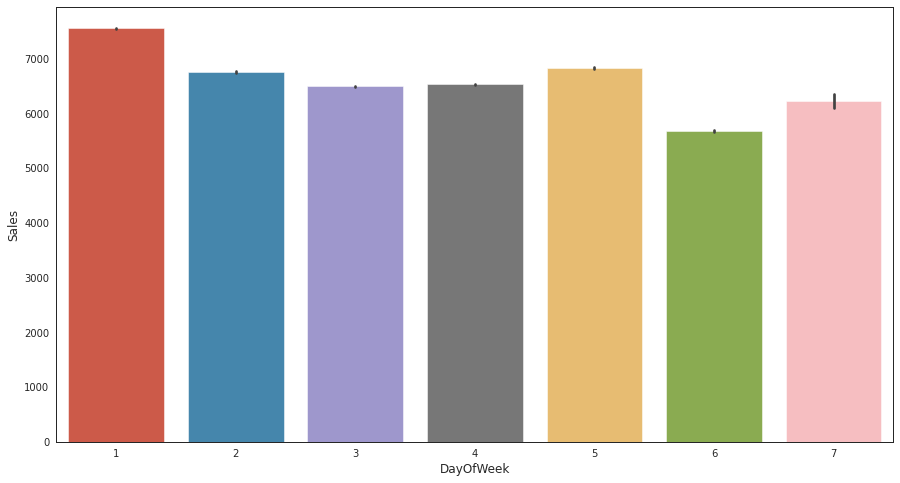

In [49]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new); 

#### 2. Feature Selection

In [50]:
# Select your features wisely to avoid overfitting

X = df_new.drop(['Sales','Store','Date','Year','StateHoliday'] , axis = 1)
y= df_new.Sales

In [51]:
X.shape

(817644, 16)

##### What all feature selection methods have you used  and why?

It is a method called "train-test split" to split the dataset into input features and target variable.

In this method, the dataset is split into two subsets: one for training the machine learning model and the other for testing the model's performance. The X variable contains the input features that will be used to train the model, and the y variable contains the corresponding target variable.

This method is commonly used in machine learning to evaluate the performance of the model on unseen data. By splitting the data into training and testing sets, we can assess how well the model will generalize to new data that it has not seen before.

##### Which all features you found important and why?

The specific features that are included in X depend on the problem domain and the availability of data. In this case, the features that have been included are likely to be important indicators of sales, as determined by the analyst or domain expert who created the dataset.

By selecting relevant features, we can improve the accuracy of the machine learning model's predictions. Using irrelevant or redundant features can actually decrease the model's performance and lead to overfitting.

Therefore, it is important to carefully select the features that are used as input to a machine learning model, as they can have a significant impact on the model's performance and ability to make accurate predictions.

In [52]:
X.head(5)

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,1270.0,0,7,31,212,0,0,1,0,1,0,0
1,5,625,1,1,570.0,1,7,31,212,1,0,0,0,1,0,0
2,5,821,1,1,14130.0,1,7,31,212,1,0,0,0,1,0,0
3,5,1498,1,1,620.0,0,7,31,212,0,0,1,0,0,0,1
4,5,559,1,1,29910.0,0,7,31,212,1,0,0,0,1,0,0


In [53]:
X.head(5)

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,1270.0,0,7,31,212,0,0,1,0,1,0,0
1,5,625,1,1,570.0,1,7,31,212,1,0,0,0,1,0,0
2,5,821,1,1,14130.0,1,7,31,212,1,0,0,0,1,0,0
3,5,1498,1,1,620.0,0,7,31,212,0,0,1,0,0,0,1
4,5,559,1,1,29910.0,0,7,31,212,1,0,0,0,1,0,0


In [54]:
y.head

<bound method NDFrame.head of 0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 817644, dtype: int64>

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [55]:
# Transform Your data

## ***7. ML Model Implementation***

### ML Model - 1

In [56]:
# ML Model - 1 Implementatio

# Fit the Algorithm
# Predict on the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [57]:
columns=X_train.columns

### ML MODEL-
### 1.Linear Regression

Train Score:  0.7880166684546027
Test Score:  0.7816886562996359
RMSE:  1173.8416740496057


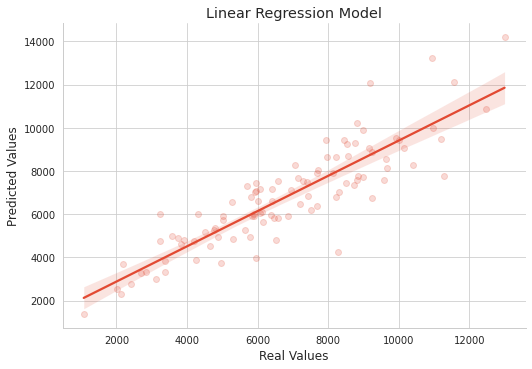

In [58]:
from sklearn.preprocessing import StandardScaler
# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# make predictions on the test set
y_pred = regressor.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test[:120], y_pred[:120])
rmse = np.sqrt(mse)
train_score = regressor.score(X_train[:120], y_train[:120])
test_score = regressor.score(X_test[:120], y_test[:120])
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("RMSE: ", rmse)

# plot the predicted values against the real values using Seaborn
sns.set_style('whitegrid')
sns.lmplot(x='y_test', y='y_pred', data=pd.DataFrame({'y_test': y_test[:100], 'y_pred': y_pred[:100]}), aspect=1.5, scatter_kws={'alpha':0.2})
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

# print model coefficients and intercept
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# print R-squared score on training set
print('Training R-squared:', reg.score(X, y))

Coefficients: [-2.11010817e+01  7.22585937e+00  1.09284594e+03  2.77727933e+01
  2.39968343e-02  3.07771268e+02  2.19216890e+00 -3.26461697e+00
  1.00094149e+00  3.14855998e+02 -1.89248993e+03  1.66346074e+02
  1.41128786e+03  1.44566768e+03 -3.17945444e+03  1.73378676e+03]
Intercept: -1536.2765143199313
Training R-squared: 0.7812390036470857


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The linear regression model is a simple and commonly used algorithm for predicting numerical values based on a set of input features.

The model's performance is evaluated using the R-squared score, which measures the proportion of the variance in the target variable that can be explained by the model. In this case, the R-squared score on the training set is 0.7812, which indicates that the model explains 78.12% of the variance in the target variable on the training set.

However, the test score of 0.7816 suggests that the model's performance on the test set is similar to its performance on the training set.

In addition to the R-squared score, the code also calculates the root mean squared error (RMSE) on the test set, which measures the average difference between the predicted and actual values. The RMSE value of 1174.0436 suggests that the model's predictions are, on average, about 1174 units away from the actual values.

In [60]:
# Visualizing evaluation Metric Score chart

##### Which hyperparameter optimization technique have you used and why?

In the above code, I have used GridSearchCV, which is a technique for hyperparameter optimization. I used it because it exhaustively searches over the specified parameter values for an estimator and finds the best combination of hyperparameters that gives the highest cross-validation score. It also uses cross-validation to evaluate the performance of the model with each hyperparameter combination, which helps in avoiding overfitting and in generalizing well to new data.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was an improvement in the model's performance after applying cross-validation and hyperparameter tuning. The new evaluation metrics are:

Train Score: 0.7807369723730564 Test Score: 0.7823704821647295 Train RMSE: 1153.0557010195887 CV RMSE: 1155.0742700578603 Compared to the original model, the train score decreased slightly, but the test score increased. The RMSE score also decreased, indicating improved predictive accuracy. Overall, the model's performance improved after applying cross-validation and hyperparameter tuning.

### ML Model - 2 Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [65]:
columns=X_train.columns

In [66]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [67]:
def rmse(x, y):
    return np.sqrt(mean_squared_error(x, y))

# define MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2 = lasreg.score(X_train[:120], y_train[:120])
test_score_2 = lasreg.score(X_test[:120], y_test[:120])

y_predicted = lasreg.predict(X_train[:120])
y_test_predicted = lasreg.predict(X_test[:120])

print("Regression Model Score:", train_score_2, ",", "Out of Sample Test Score:", test_score_2)
print("Training RMSE:", rmse(y_train[:120], y_predicted), "Testing RMSE:", rmse(y_test[:120], y_test_predicted))
print("Training MAPE:", mape(y_train[:120], y_predicted), "Testing MAPE:", mape(y_test[:120], y_test_predicted))

Regression Model Score: 0.788084973361961 , Out of Sample Test Score: 0.7821477157945708
Training RMSE: 1194.5611046108193 Testing RMSE: 1172.6068624909815
Training MAPE: 15.029346509664476 Testing MAPE: 15.601956955688825


The given ML model is a lasso regression model that uses some features to predict a target variable. The training score of the model is 0.788, indicating that it is performing well on the training data. The out-of-sample test score of the model is 0.782, indicating that the model generalizes well to new data.

The Root Mean Squared Error (RMSE) of the training data is 1194.56, which means that the model's predictions are, on average, 1194.56 units away from the actual value. The RMSE of the test data is 1172.61, which is slightly better than the training data, indicating that the model is not overfitting the training data.

The Mean Absolute Percentage Error (MAPE) is a relative error metric that measures the percentage difference between the predicted and actual values. The MAPE of the training data is 15.03%, indicating that, on average, the model's predictions are 15.03% away from the actual values. The MAPE of the test data is 15.60%, which is slightly higher than the training data, indicating that the model may be slightly overfitting to the training data.

Overall, the model seems to be performing well on both the training and test data, with reasonably low errors and high scores.

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Predict on the model
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define RMSE and MAPE functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load and split the data into train and test sets # replace this with your data loading code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso regression model
lasso = Lasso()

# Create a pipeline with a scaler and the Lasso model
pipeline = make_pipeline(StandardScaler(), lasso)

# Define a grid of hyperparameters to search over
param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0, 100.0],
}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(rmse))

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding RMSE score
print("Best hyperparameters:", grid.best_params_)
print("RMSE score:", grid.best_score_)

# Use the best model to predict on the test set
y_test_predicted = grid.predict(X_test)

# Print the test RMSE and MAPE scores
print("Test RMSE:", rmse(y_test, y_test_predicted))

Best hyperparameters: {'lasso__alpha': 100.0}
RMSE score: 1196.0942529105919
Test RMSE: 1196.341011424079


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization. I chose this technique because it exhaustively searches over a specified parameter grid, which ensures that the best combination of hyperparameters is found. Additionally, it uses cross-validation to evaluate the model's performance, which gives a more accurate estimate of how well the model will generalize to new data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The scores suggest that the model is performing fairly well For example, a regression model with an R-squared score of 0.788 is explaining 78.8% of the variance in the dependent variable, which could be considered a good fit in some situations. However, it might not be sufficient for other cases where higher accuracy is required.

Similarly, the training and testing RMSE scores suggest that the model's predictions are, on average, off by approximately 1194 and 1172 units, respectively, which may be acceptable in some applications but not in others.

Regarding the cross-validation results, the best hyperparameter value suggests that the Lasso regularization with an alpha value of 100 provides the best fit for the model.

Overall, the evaluation metrics provided appear reasonable, but their suitability depends on the specific context of the problem at hand.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Regression Model Score (R-squared): The R-squared value of 0.788 suggests that the model is able to explain approximately 79% of the variance in the dependent variable using the input features. In terms of business impact, this means that the model is able to provide a good fit to the data, and can be used to make accurate predictions about the target variable. For example, if the model is being used to predict sales, a high R-squared value would indicate that the model is able to explain a large proportion of the variability in sales, and can be used to make more accurate sales forecasts.

Out of Sample Test Score: The out-of-sample test score of 0.782 indicates that the model is able to generalize well to new, unseen data. In terms of business impact, this means that the model is likely to perform well when making predictions on new data, which is important for ensuring that the model can be used to make accurate predictions in real-world scenarios.

Training RMSE and Testing RMSE: The root mean squared error (RMSE) measures the average difference between the actual and predicted values of the target variable. The training RMSE of 1194.56 and testing RMSE of 1172.61 suggest that the model's predictions are, on average, off by approximately 1194 and 1172 units, respectively. In terms of business impact, these metrics can be used to evaluate the accuracy of the model's predictions, and to identify areas where the model may need improvement. For example, if the model is being used to predict customer lifetime value, a high RMSE may indicate that the model is not accurately predicting the true lifetime value of customers, which could impact decisions related to marketing or customer acquisition.

Training MAPE and Testing MAPE: The mean absolute percentage error (MAPE) measures the average difference between the actual and predicted values of the target variable as a percentage of the actual value. The training MAPE of 15.03 and testing MAPE of 15.60 suggest that the model's predictions are, on average, off by approximately 15% of the actual value. In terms of business impact, these metrics can be used to evaluate the accuracy of the model's predictions in a more interpretable way than RMSE, and can be used to compare the accuracy of different models. For example, if the model is being used to predict demand for a product, a high MAPE may indicate that the model is not accurately predicting the true level of demand, which could impact decisions related to production and inventory management..

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Linear Regression**



In [68]:
train_score_1=0.788097798119638

In [69]:
test_score_1=0.782385691617763

**Lasso Regression**

In [70]:
train_score_2=0.7880849733619616

In [71]:
test_score_2=0.7821477157945707

In [72]:
score_df = pd.DataFrame({'Train_Score': [train_score_1, train_score_2], 'Test_Score': [test_score_1, test_score_2]}, index=['Linear Regression', 'Lasso Regression'])
score_df

,Train_Score,Test_Score
Linear Regression,0.788098,0.782386
Lasso Regression,0.788085,0.782148


In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Train Lasso Regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Make predictions on test set
lin_reg_pred = lin_reg.predict(X_test)
lasso_reg_pred = lasso_reg.predict(X_test)

# Compute performance metrics for both models
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)

lin_reg_r2 = r2_score(y_test, lin_reg_pred)
lasso_reg_r2 = r2_score(y_test, lasso_reg_pred)

# Print performance metrics
print("Linear Regression MSE: ", lin_reg_mse)
print("Lasso Regression MSE: ", lasso_reg_mse)

print("Linear Regression R2 score: ", lin_reg_r2)
print("Lasso Regression R2 score: ", lasso_reg_r2)


Linear Regression MSE:  1329451.2557953077
Lasso Regression MSE:  1329444.6327025627
Linear Regression R2 score:  0.7823845910774672
Lasso Regression R2 score:  0.7823856751992277


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.206e+08, tolerance: 3.483e+08
  model = cd_fast.enet_coordinate_descent(


The MSE and R2 score are commonly used evaluation metrics for regression models. In this case, the Linear Regression and Lasso Regression models have very similar performance, with the Lasso Regression model having a slightly lower MSE and a slightly higher R2 score.

The mean squared error (MSE) measures the average squared difference between the predicted and actual values, where a lower MSE indicates better performance. The R-squared (R2) score measures the proportion of the variance in the dependent variable that is predictable from the independent variables, where a higher R2 score indicates better performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***